In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DoubleType

spark = SparkSession.builder.getOrCreate()

# Schema
schema = StructType([
    StructField("order_id", StringType()),
    StructField("region", StringType()),
    StructField("category", StringType()),
    StructField("quantity", IntegerType()),
    StructField("price", IntegerType())
])

# Inline data
data = [
    ("O001", "South", "Electronics", 3, 15000),
    ("O002", "North", "Clothing", 5, 2000),
    ("O003", "East", "Furniture", 2, 12000),
    ("O004", "West", "Electronics", 1, 18000),
    ("O005", "North", "Furniture", 4, 9000),
    ("O006", "South", "Clothing", 6, 2500),
    ("O007", "East", "Electronics", 2, 17000)
]

df = spark.createDataFrame(data, schema)
df.show()


+--------+------+-----------+--------+-----+
|order_id|region|   category|quantity|price|
+--------+------+-----------+--------+-----+
|    O001| South|Electronics|       3|15000|
|    O002| North|   Clothing|       5| 2000|
|    O003|  East|  Furniture|       2|12000|
|    O004|  West|Electronics|       1|18000|
|    O005| North|  Furniture|       4| 9000|
|    O006| South|   Clothing|       6| 2500|
|    O007|  East|Electronics|       2|17000|
+--------+------+-----------+--------+-----+



In [3]:
from pyspark.sql.functions import col,sum,avg,count

df  = df.withColumn("revenue",col("quantity")* col("price"))

category_summary = df.groupBy("category").agg(
    sum("quantity").alias("total_quantity"),
    sum("revenue").alias("total_revenue"),
    avg("revenue").alias("avg_order_value")
)
category_summary.show()

region_summary = df.groupBy("region").agg(
    count("*").alias("total_orders"),
    sum("revenue").alias("total_revenue")
)
region_summary.show()

+-----------+--------------+-------------+------------------+
|   category|total_quantity|total_revenue|   avg_order_value|
+-----------+--------------+-------------+------------------+
|Electronics|             6|        97000|32333.333333333332|
|   Clothing|            11|        25000|           12500.0|
|  Furniture|             6|        60000|           30000.0|
+-----------+--------------+-------------+------------------+

+------+------------+-------------+
|region|total_orders|total_revenue|
+------+------------+-------------+
| South|           2|        60000|
|  East|           2|        58000|
| North|           2|        46000|
|  West|           1|        18000|
+------+------------+-------------+



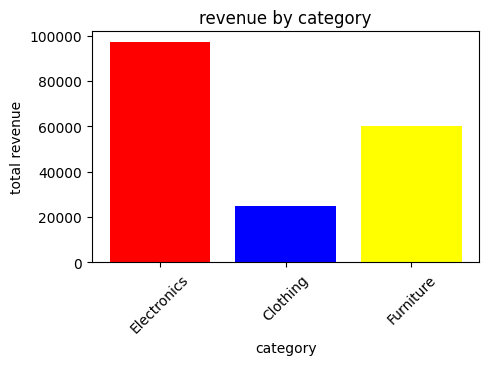

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
pdf = category_summary.toPandas()
plt.figure(figsize=(5,3))
plt.bar(pdf["category"],pdf["total_revenue"],color = ["red","blue","yellow"])
plt.xticks(rotation = 45)
plt.xlabel("category")
plt.ylabel("total revenue")
plt.title("revenue by category")
plt.show()

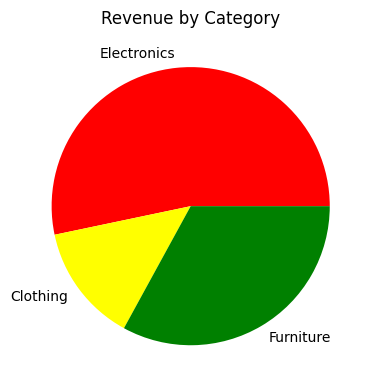

In [11]:
plt.figure(figsize=(4, 4))
plt.pie(
    pdf["total_revenue"],
    labels=pdf["category"],
    startangle=0,
    colors=["red","yellow","green"]
)
plt.title("Revenue by Category")
plt.tight_layout()
plt.show()

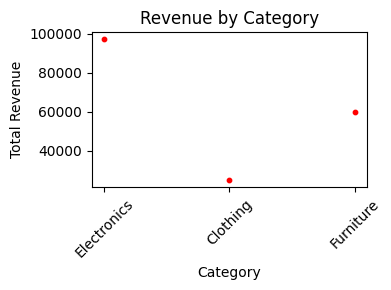

In [16]:
plt.figure(figsize=(4, 3))
plt.scatter(pdf["category"], pdf["total_revenue"], color="red", s=10)
plt.xlabel("Category")
plt.ylabel("Total Revenue")
plt.title("Revenue by Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()